# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем библиотеку pandas
# cчитываем данные из csv-файла в датафрейм и сохраните в переменную data

import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

In [2]:
# выводим первые 20 строк таблицы
# чтобы посмотреть данные и проверить как они разделились

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Описание данных:

- ``airports_nearest`` — расстояние до ближайшего аэропорта в метрах (м)
- ``balcony`` — число балконов
- ``ceiling_height`` — высота потолков (м)
- ``cityCenters_nearest`` — расстояние до центра города (м)
- ``days_exposition`` — сколько дней было размещено объявление (от публикации до снятия)
- ``first_day_exposition`` — дата публикации
- ``floor`` — этаж
- ``floors_total`` — всего этажей в доме
- ``is_apartment`` — апартаменты (булев тип)
- ``kitchen_area`` — площадь кухни в квадратных метрах (м²)
- ``last_price`` — цена на момент снятия с публикации
- ``living_area`` — жилая площадь в квадратных метрах (м²)
- ``locality_name`` — название населённого пункта
- ``open_plan`` — свободная планировка (булев тип)
- ``parks_around3000`` — число парков в радиусе 3 км
- ``parks_nearest`` — расстояние до ближайшего парка (м)
- ``ponds_around3000`` — число водоёмов в радиусе 3 км
- ``ponds_nearest`` — расстояние до ближайшего водоёма (м)
- ``rooms`` — число комнат
- ``studio`` — квартира-студия (булев тип)
- ``total_area`` — общая площадь квартиры в квадратных метрах (м²)
- ``total_images`` — число фотографий квартиры в объявлении

In [3]:
# получаем общую информацию о таблице

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Имеем 22 колонки и 23699 строк.     
Cразу заметно наличие пропусков в некоторых из них. Рассмотрим их на этапе предобработки данных.      
Выведем отдельно написание названий столбцов и проверим правильность написания.  

In [4]:
# выводим все названия столбцов
# чтобы проверить стиль написания названия столбцов

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Название столбца расстояния до центра написано верблюжим регистром, приведем его к змеиному.

In [5]:
# переименовываем столбец cityCenters_nearest в змеиный регистр
# повторно проверяем названия столбцов

data.columns = data.columns.str.replace('cityCenters_nearest', 'city_centers_nearest')
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Замены типа данных требуют:**   
- первый день размещения объявлений
- балкон, парк и пруд на расстоянии 3000 м, длительность размещения объявления
- апартаменты - являются булевыми значениями, тоже нужно заменить

In [7]:
# проверяем наличие явных дубликатов

data.duplicated().sum()

0

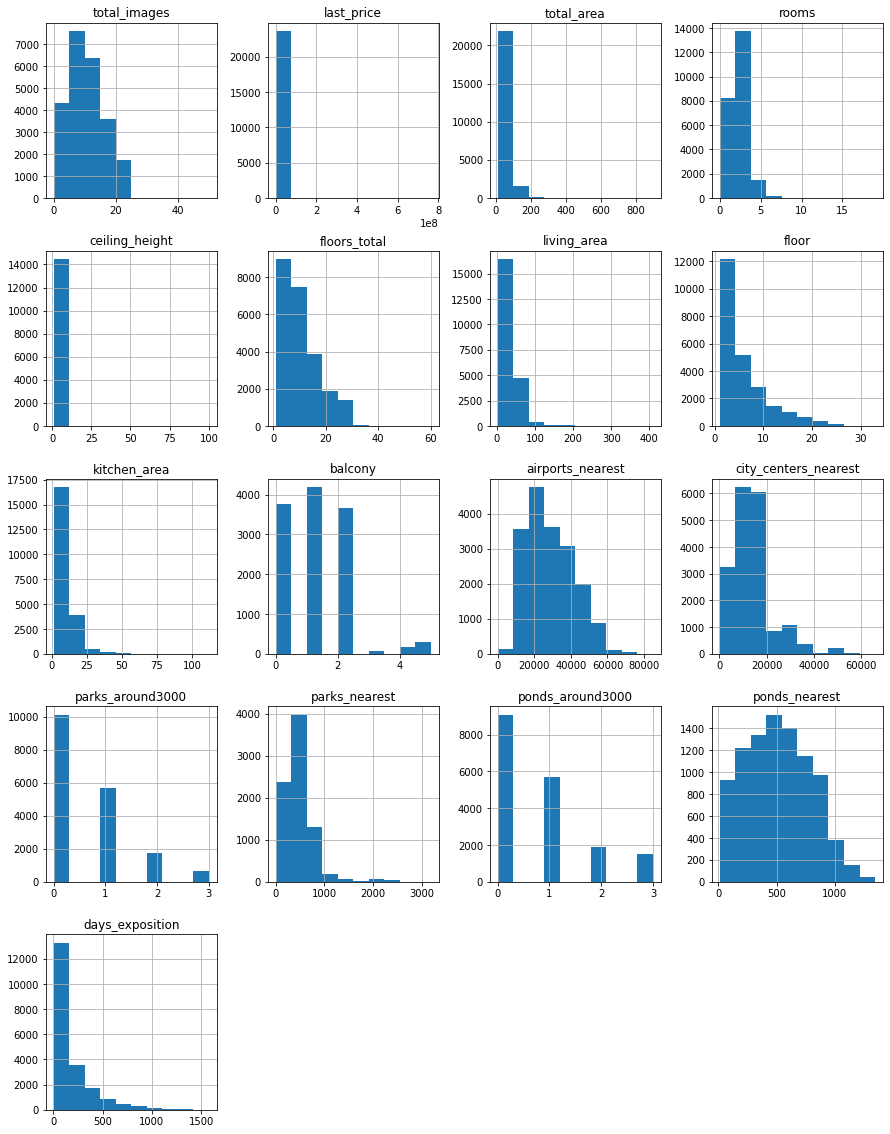

In [8]:
# строим гексаграммы для всех числовых столбцов таблицы

data.hist(figsize=(15, 20));

**Информация о данных на этом этапе:**  
- имеем 22 колонки и 23699 строк
- видны пропущенные значения, которые будем обрабатывать следующими шагами
- было одно название столбца в неверном регистре - привели его к змеиному
- гистограммы в целом имеют пуассоновское распределение и требуют дальнейшего рассмотрения, когда будут обработаны пропуски в данных
- явных дубликатов в данных нет, значит дальше нужнот будет проводить проверку только на неявные дубликаты
- имеются данные с неверным форматом, заменим их на этапе предобработки данных

### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах:  
  
- Определим, в каких столбцах есть пропуски.
- Заполним пропущенные значения там, где это возможно.

In [9]:
# подсчет пропусков

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- Пропуски есть в 14 столбцах из 22.  
- В ячейках высоты потолков, этажности, жилой и кухонной площадей, длительность размещения оъявления вероятно потеря данных вызвана либо техническим сбоем либо владелец при заполнении оъявления ограничился указанием только общей площади квартиры и ее этажа. Данные пропуски можно заполнить медианным значение после исследования анамальных значений.    
- Есть ячейки пропуски в которых вероятно вызваны отсутствием этого параметра в квартире или в населенном пункте. К ним относятся балкон, близжайщие аэропорты и центры города, парки и пруды в округе 3000 метров, близжайщие парки и пруды.  
- Пропуски в ячейке являтся ли квартира апартаментами довольно много пропусков. Может быть вызвано тем, что апартаменты относительно новое явление на рынке недвижимости и в годы рахмещения этих объявлений их было мало. Здесь пропуски можно заполнить значением False, так как ячейчас явлеятеся булевым типом.  
- В ячейке с названием населенных пунктов имеется 49 пропусков. Поскольку без месторасположения объявление о продаже недвижимости не имеет смысла, то эти строки можно удалить без вреда данным.

In [10]:
# заполняем значения нулем в тех столбцах, где можно сделать логическое предположение
# что пропущенны значения из-за отсутствия в квартирах этого параметра

columns_to_replace = ['balcony', 
                      'parks_around3000',
                      'ponds_around3000',
                     ]

for column in columns_to_replace:
    data[column] = data[column].fillna(0)

In [11]:
# заменин пропуски в населенных пунктах на NaN для удобства

data['locality_name'] = data['locality_name'].fillna('NaN')

In [12]:
# зададим условия для удаления пустых строк из насленных пунктов

data = data[(data['locality_name'] != 'NaN')]

#data['locality_name'].dropna()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> А почему нельзя было сразу удалить пропуски и все?

<div class="alert alert-info">
<b>Вот так? Через dropna()? </b> 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Да, вот только не забывай сбрасывать индексы, хорошо?

In [13]:
# обработаем пропуски в столбце апартаментов

data['is_apartment'] = data['is_apartment'].fillna(False)

In [14]:
# обработаем пропуски в столбце длительности размещения объявления медианным значением

data['days_exposition'] = data['days_exposition'].round()

In [15]:
# проверяем остались ли пропуски

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

Пропуски остались в высоте потолков, этажности, жилой и кухонной площадей.  
Их обработаем после проверки на аномальные значения.  
  
Значения в ближайщих аэропортах, парках и прудах не будем трогать, так как нулевые значения могут исказить дальнейший анализ. 

#### Рассмотрите типы данных в каждом столбце:  

 - Найдем столбцы, в которых нужно изменить тип данных.
 - Преобразуем тип данных в выбранных столбцах.

In [16]:
# выведем для наглядности 5 строк таблицы

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Замены типа данных требуют:**   
- первый размещения объявлений  - приведем к формаду datetime
- балкон, парк и пруд на расстоянии 3000 м, длительность размещения объявления - приведем к значение int
- апартаменты - являются булевыми значениями, приведем их к типу bool

In [17]:
# форматируем дату размещения в datetime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [18]:
# преобразуем тип данных в указанных столбцах
# проверим преобразование

columns = ['balcony']

data[columns] = data[columns].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [19]:
# выводим уникальные названия населенных пунктов

data = data.sort_values(by='locality_name')
data['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [20]:
# проверим сколько всего уникальных значений имеется

len(data['locality_name'].unique())

364

In [21]:
# заменим сначала частую ошибку в словах поселок

data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [22]:
# далее приведем к единому написанию городской поселок

data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок')

In [23]:
data['locality_name'] = data['locality_name'].str.replace('село','')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество','')
data['locality_name'] = data['locality_name'].str.replace('деревня','')
data['locality_name'] = data['locality_name'].str.replace('поселок','')
data['locality_name'] = data['locality_name'].str.replace('пок','')

In [24]:
# проверим количество уникальных значений после обработки неявных дубликатов

len(data['locality_name'].unique())

312

In [25]:
data['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', ' Большая Ижора',
       ' Янино-1', ' Будогощь', ' Виллози', ' Лесогорский', ' Мга',
       ' Назия', ' Новоселье', ' Павлово', ' Рощино', ' Свирьстрой',
       ' Советский', ' Федоровское', ' Агалатово', ' Аро', ' Батово',
       ' Бегуницы', ' Белогорка', ' Большая Вруда', ' Большая Пустомержа',
       ' Большие Колпаны', ' Большое Рейзино', ' Большой Сабск', ' Бор',
       ' Борисова Гри

#### Найдем и устраним редкие и выбивающиеся значения.

In [26]:
# проверяем аномальные значения в столбцах с типом данных int и float
# в первую очередь проверим те столбцы, где оставили пропуски

data['ceiling_height'].unique()

array([  5.  ,    nan,   2.8 ,   2.5 ,   2.55,   2.6 ,   3.  ,   2.52,
         2.7 ,   2.75,   2.58,   3.1 ,  32.  ,   3.2 ,   2.4 ,   2.54,
         2.65,   3.5 ,   2.85,   2.53,   2.  ,   2.78,   2.56,   2.57,
         2.9 ,   2.64,   3.05,   4.  ,   2.95,   2.77,   2.71,   4.2 ,
         3.7 ,   3.83,   4.5 ,   3.15,   3.6 ,   2.3 ,   3.3 ,   2.74,
        25.  ,   2.51,   2.76,   3.18,   3.13,   3.4 ,   8.  ,   2.59,
         2.88,   3.38,   2.94,   3.55,   3.62,   2.48,   2.73,   2.45,
         2.84,   2.67,   2.98,   2.83,   2.62,   3.95,   3.75,   2.69,
         3.8 ,   2.72,   3.12,   2.87,   3.24,   2.68,   3.33,   2.82,
         3.35,  14.  ,   3.63,   3.26,   3.49,   2.91,   3.02,   2.81,
         3.06,   3.22,   3.25,   2.97,   3.23,   3.9 ,   3.27,   3.65,
         2.86,   4.14,   3.56,   3.45,   5.3 ,   3.46,   3.53,   3.51,
         3.85,   4.4 ,   2.92,   3.17,   3.03,   3.04,   2.93,   4.65,
         2.63,   3.08,   3.31,   3.32,   2.46,   3.42,   2.99,   2.66,
      

In [27]:
data.loc[(data['ceiling_height'] >= 14), 'ceiling_height'] /= 10

In [28]:
data['ceiling_height'].unique()

array([ 5.  ,   nan,  2.8 ,  2.5 ,  2.55,  2.6 ,  3.  ,  2.52,  2.7 ,
        2.75,  2.58,  3.1 ,  3.2 ,  2.4 ,  2.54,  2.65,  3.5 ,  2.85,
        2.53,  2.  ,  2.78,  2.56,  2.57,  2.9 ,  2.64,  3.05,  4.  ,
        2.95,  2.77,  2.71,  4.2 ,  3.7 ,  3.83,  4.5 ,  3.15,  3.6 ,
        2.3 ,  3.3 ,  2.74,  2.51,  2.76,  3.18,  3.13,  3.4 ,  8.  ,
        2.59,  2.88,  3.38,  2.94,  3.55,  3.62,  2.48,  2.73,  2.45,
        2.84,  2.67,  2.98,  2.83,  2.62,  3.95,  3.75,  2.69,  3.8 ,
        2.72,  3.12,  2.87,  3.24,  2.68,  3.33,  2.82,  3.35,  1.4 ,
        3.63,  3.26,  3.49,  2.91,  3.02,  2.81,  3.06,  3.22,  3.25,
        2.97,  3.23,  3.9 ,  3.27,  3.65,  2.86,  4.14,  3.56,  3.45,
        5.3 ,  3.46,  3.53,  3.51,  3.85,  4.4 ,  2.92,  3.17,  3.03,
        3.04,  2.93,  4.65,  2.63,  3.08,  3.31,  3.32,  2.46,  3.42,
        2.99,  2.66,  3.47,  3.01,  3.28,  3.54,  2.79,  3.93,  3.66,
        5.8 ,  3.07,  2.61,  2.49,  3.34,  3.21,  2.26,  6.  ,  3.16,
        3.58,  2.89,

In [29]:
# проведем проверку аномальных значений в жилой площади

data['living_area'].unique()

array([  nan, 17.  , 47.4 , ..., 14.39, 31.07, 29.61])

In [30]:
# проверим округленные значения на всякий случай

data['living_area'].value_counts().round()

18.00    882
17.00    674
30.00    598
16.00    485
20.00    479
        ... 
54.43      1
86.10      1
99.70      1
29.74      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

In [31]:
# проведем проверку аномальных значений в кухонной площади

data['kitchen_area'].unique()

array([   nan,   6.  ,   8.  ,   8.5 ,   7.5 ,   9.  ,   7.  ,   8.2 ,
         8.3 ,   8.7 ,   8.4 ,   8.1 ,   5.6 ,   6.5 ,   6.4 ,   5.31,
         8.6 ,   9.2 ,   5.  ,  10.  ,   5.5 ,  14.2 ,   5.7 ,  11.  ,
         7.3 ,   7.03,  15.  ,   4.6 ,   5.4 ,   5.9 ,   7.4 ,   5.2 ,
         6.7 ,   6.8 ,  11.95,  14.3 ,  14.  ,  22.3 ,  10.1 ,   9.5 ,
        13.6 ,  20.  ,  11.7 ,  10.8 ,  12.2 ,   7.89,   9.3 ,  12.  ,
        12.5 ,   5.3 ,  16.1 ,  22.9 ,  10.4 ,  12.1 ,  10.5 ,  13.04,
         9.4 ,   6.3 ,  16.  ,  28.1 ,   9.8 ,  10.3 ,   8.82,  10.7 ,
        15.8 ,  13.  ,   5.8 ,  25.  ,  12.7 ,  15.9 ,  18.  ,  11.8 ,
        13.7 ,  11.2 ,   9.68,  14.5 ,  11.4 ,   8.18,  13.2 ,  18.5 ,
         9.25,   9.6 ,  10.78,  30.  ,   8.9 ,  12.39,  11.29,  11.6 ,
         6.6 ,  16.3 ,  13.8 ,   7.6 ,  13.4 ,  11.3 ,  10.6 ,  12.6 ,
        10.2 ,  11.1 ,  12.4 ,   7.2 ,  13.9 ,  14.6 ,   6.73,  35.  ,
         8.8 ,  10.95,   7.7 ,  11.5 ,  14.4 ,  12.9 ,  14.1 ,  12.3 ,
      

In [32]:
# проверим округленные значения на всякий случай

data['kitchen_area'].value_counts().round()

6.00     1298
10.00    1259
8.00     1108
9.00     1100
7.00     1062
         ... 
7.78        1
7.12        1
13.73       1
14.74       1
16.74       1
Name: kitchen_area, Length: 968, dtype: int64

In [33]:
# проведем проверку аномальных значений этажности

data['floors_total'].unique()

array([ 3.,  5.,  4.,  2.,  1.,  6.,  9.,  7., 11., 10., 14.,  8., 16.,
       17., 22., 12., 18., 15., 23., 13., 20., 24., nan, 60., 25., 21.,
       19., 27., 35., 26., 28., 33., 37., 52., 36., 34., 29.])

In [34]:
# проверим все ли пропуски теперь заполнены

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [35]:
# проведем проверку аномальных значений количества фотографий

data['total_images'].unique()

array([13,  4, 11,  3,  8,  7,  0,  9,  6, 10, 12,  2, 15,  1, 20, 14,  5,
       16, 18, 17, 19, 23, 29, 35, 42, 26, 50, 21, 22, 24, 37, 30, 31, 28,
       27, 25, 32, 39])

In [36]:
# проведем проверку аномальных значений стоимости

data['last_price'].value_counts().round()

4500000.0     342
3500000.0     289
4300000.0     260
4000000.0     260
4200000.0     258
             ... 
7297000.0       1
31490000.0      1
6552700.0       1
565000.0        1
4386000.0       1
Name: last_price, Length: 2964, dtype: int64

In [37]:
# проведем проверку аномальных значений общей площади

data['total_area'].value_counts().round()

45.00     419
42.00     383
60.00     346
31.00     346
44.00     343
         ... 
154.10      1
30.26       1
15.50       1
116.80      1
55.06       1
Name: total_area, Length: 2181, dtype: int64

In [38]:
# проведем проверку аномальных значений количества комнат

data['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [39]:
# проверим теперь уникальные значенмя

data['rooms'].unique()

array([ 1,  2,  3,  4,  0,  5,  8,  6,  7,  9, 19, 14, 10, 12, 16, 15, 11])

In [40]:
# проверим уникальные значения этажа

data['floor'].unique()

array([ 1,  2,  5,  3,  4,  7,  6, 10, 13, 12,  9,  8, 15, 16, 14, 11, 20,
       17, 21, 24, 18, 23, 25, 22, 19, 27, 26, 32, 33, 31, 28, 30, 29])

In [41]:
# проверим уникальные значения балконов

data['balcony'].unique()

array([0, 1, 2, 4, 5, 3])

In [42]:
# проверим уникальные значения продолжительности размещения объявления

data['days_exposition'].value_counts().round()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      203
         ... 
1344.0      1
1292.0      1
1232.0      1
1322.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

**На этом шаге сделано:**  
- выявлены и обработаны неявные дубликаты в названиях населенных пунктов
- выявлены и обработаны аномальные значения в высоте потолков
- заполнены медианными значениями пропуски в высоте потолков, жилой и кухонной площадях

### Посчитайте и добавьте в таблицу новые столбцы  

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [43]:
# добавляем столбец с рассчетом стоимость квадратного метра
# округляем значение до трех знаком после запятой

data['price_for_square_meter'] = (data['last_price'] / data['total_area']).round(3)

In [44]:
#выводим в отдельный стобец день недели размещения объявления о продаже

data['exposition_day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [45]:
#выводим в отдельный стобец месяц размещения объявления о продаже

data['exposition_month'] = data['first_day_exposition'].dt.month

In [46]:
#выводим в отдельный стобец год размещения объявления о продаже

data['exposition_year'] = data['first_day_exposition'].dt.year

In [47]:
# для категоризации этажа зададим условия в функции

def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [48]:
# применим созданную выше функцию

data['floor_type'] = data.apply(floor_category, axis = 1)

In [49]:
# добавляем столбец с расстоянием до центра города в километрах

data['city_centers_nearest_kilometers'] = round(data['city_centers_nearest']/1000)

In [50]:
# проверим значения

data['city_centers_nearest_kilometers'].unique()

array([nan, 53., 54., 55., 62., 63., 60., 57., 59., 51., 31., 34., 33.,
       32., 30., 29., 37., 36., 35., 28., 42., 41., 27., 47., 52., 49.,
       50., 48., 61., 40., 39., 26., 25., 24.,  5., 10., 12.,  8., 15.,
        2., 22., 11., 16., 17.,  9.,  1., 14., 13., 18.,  4., 21., 19.,
        6.,  3.,  7., 20., 23.,  0., 43., 65., 66., 45.])

In [51]:
# проверим все ли столбцы добавились и нет ли ошибок

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,exposition_day_of_week,exposition_month,exposition_year,floor_type,city_centers_nearest_kilometers
1053,13,550000.0,29.0,2018-02-01,1,5.0,3.0,NaN,1,False,...,NaN,0.0,NaN,6.0,18965.517,3,2,2018,первый,NaN
764,4,950000.0,44.0,2018-05-05,2,NaN,5.0,NaN,2,False,...,NaN,0.0,NaN,156.0,21590.909,5,5,2018,другой,NaN
14637,11,750000.0,42.0,2017-12-18,2,NaN,5.0,NaN,5,False,...,NaN,0.0,NaN,45.0,17857.143,0,12,2017,последний,NaN
8630,3,560000.0,32.0,2018-06-16,1,NaN,3.0,17.0,1,False,...,NaN,0.0,NaN,45.0,17500.000,5,6,2018,первый,NaN
19186,8,970000.0,61.5,2018-04-04,3,NaN,5.0,47.4,1,False,...,NaN,0.0,NaN,273.0,15772.358,2,4,2018,первый,NaN


### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов:  

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

In [52]:
# рассмотрим площадь квартир
# сначала получаем общее представление

data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

В данных имеются квартиры от 12 до 900 кв.м.   
Среднее значение 60 кв.м, что кажется более здравым.  
Посмотрим как это выглядит на гистограмме.

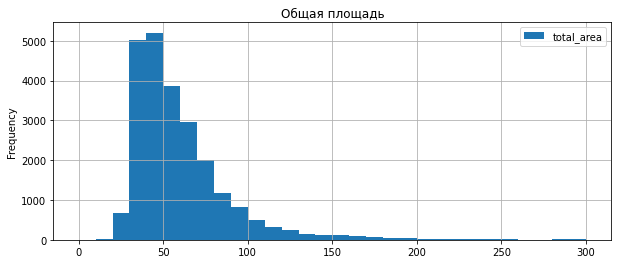

In [53]:
# строим гистограмму общей площади

data.plot(kind='hist', 
          title='Общая площадь', 
          y='total_area', 
          bins=30, 
          grid=True, 
          figsize=(10,4), 
          range=(0,300));

Наблюдается распределние Пуассона с небольшими выбросами, на графике данные выглядят вполне реалистично и выборсы в целом не портят общую картину. Наибольшее число значений находится между 25 и 70-75 кв метрами, что реалистично. 

In [54]:
# общее представление о жилой площади

data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Жилая площать варьируется от 2 до 409,7 кв метров, при этом среднее значение 34 кв м.  
Вероятно значение 2 является выбросом. Посмотрим на распределние на гистограмме.

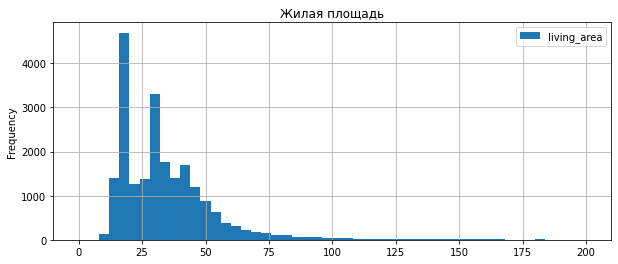

In [55]:
# сторим гистограмму жилой площади

data.plot(kind='hist', 
          title='Жилая площадь', 
          y='living_area', 
          bins=50, 
          grid=True, 
          figsize=(10,4), 
          range=(0,200));

На графике видны выбросы, что подтверждает предварительные данные.  
Основные значения в диапазоне 12-13 и 50

In [56]:
# общее представление о кухонной площади

data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Кухонная площадь имеет размеры от 1,3 до 112 кв м. Среднее значение - 10,4 кв м. 

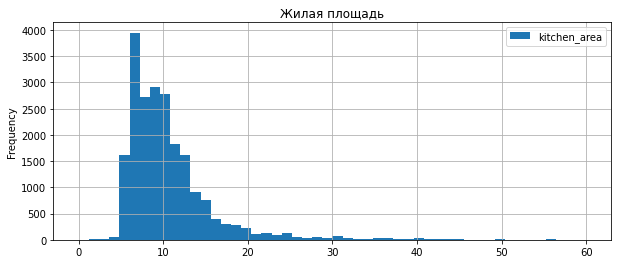

In [57]:
# сторим гистограмму кухонной площади

data.plot(kind='hist', 
          title='Жилая площадь', 
          y='kitchen_area', 
          bins=50, 
          grid=True, 
          figsize=(10,4), 
          range=(0,60));

Гистограмма показывает, что выбросы действительно есть.  
В данных имеется неправдопободно маленькое и большое значения.  
В среднем же площадь вполне адекватная.

In [58]:
# общее представление о стоимости объекта

data['last_price'].describe().round()

count        23650.0
mean       6541127.0
std       10896399.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

В стоимости разброс от 12 190 до 763 000 000, средняя стоимость - 6 541 127 рублей.  
Тут также видим нереалистичноть минамальной цены и сомнения вызывает максимальная. Если местоположение таких квартир в центре, то возможно они могут стоить так дорого, но данные лучше проверить у содруников, их предоставивших.

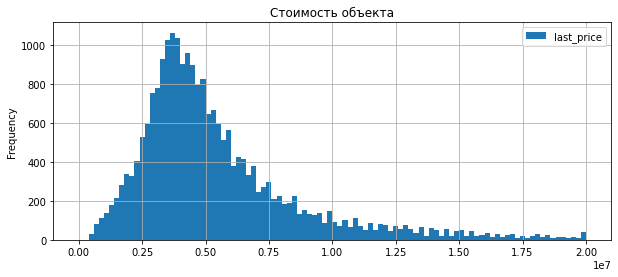

In [59]:
# сторим гистограмму стоимость объекта

data.plot(kind='hist', 
          title='Стоимость объекта', 
          y='last_price', 
          bins=100, 
          grid=True, 
          figsize=(10,4), 
          range=(0,20000000));

Гистограмма подтверждает наблюдения. Основная масса цен находится примерно до 10 млн рублей. 

In [60]:
# общее представление о количестве комнат

data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Минимальное количество комнат - 1, максимальное - 19, среднее  - 2.  
19 выглядит выбросом. Посмотрим на гистограмме.

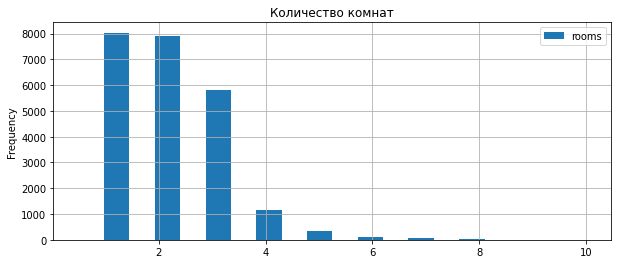

In [61]:
# строим гистограмму параметра количества комнат

data.plot(kind='hist', 
          title='Количество комнат', 
          y='rooms', 
          bins=20, 
          grid=True, 
          figsize=(10,4),
          range=(0.5,10));

Основное количество наблюдается до 5-6. Что выглядит вполне вероятно. 

In [62]:
# общее представление о высоте потолков

data['ceiling_height'].describe()

count    14490.000000
mean         2.728486
std          0.305870
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.300000
Name: ceiling_height, dtype: float64

Минимальная высота потолков - 1 метр, максимальная 10, а среднее  - 2,7.  
Среднее значение выглядит реалистично, тогда как мин и макс похожи на выбросы. 

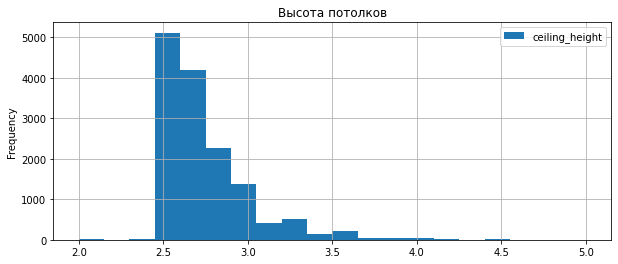

In [63]:
# строим гистограмму высоты потолков

data.plot(kind='hist', 
          title='Высота потолков', 
          y='ceiling_height', 
          bins=20, 
          grid=True, 
          figsize=(10,4),
          range=(2,5));

Гистограмма имеет распределение Пуассона и показывает, что основные значение лежать между 2.4 и 3 метров. 

In [64]:
# общее представление об этаже объекта

data['floor'].describe()

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

У этажей объектов разброс значение между 1 и 33. Средний нзначение между 5-6.


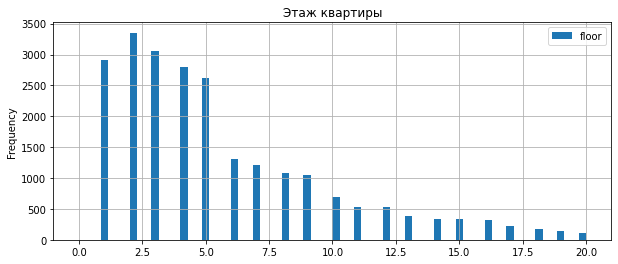

In [65]:
# сторим гистограмму этажей

data.plot(kind='hist', 
          title='Этаж квартиры', 
          y='floor', 
          bins=70, 
          grid=True, 
          figsize=(10,4),
          range=(0,20));

Основные значения в районе 2-17 этажей.

In [66]:
# общее представление о типе этаже объекта

data['floor_type'].describe()

count      23568
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object

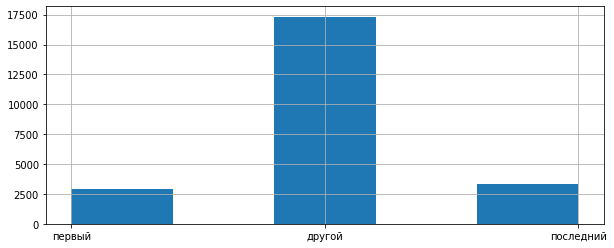

In [67]:
# сторим гистограмму типов этажей

data['floor_type'].hist(bins=5, figsize=(10,4));

Основные этажи находятся в разделе 'другой' - это подтверждает предыдущий вывод.  

In [68]:
# общее представление об этажности домов

data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Количество этажей в домах, где находятся квартиры, находится в диапазоне от 1 до 60, со средним значением 10,7, то есть 10-11 этажей. 

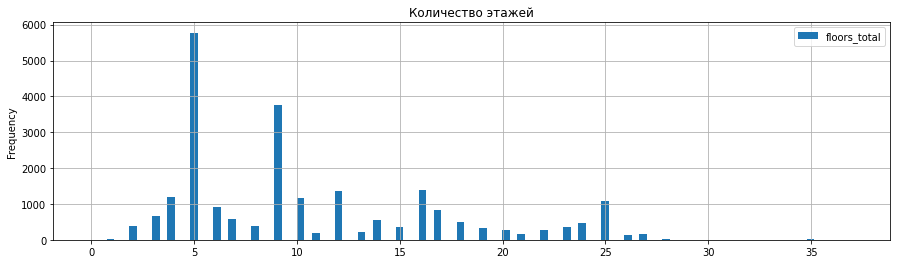

In [69]:
# сторим гистограмму этажности домов

data.plot(kind='hist', 
          title='Количество этажей', 
          y='floors_total', 
          bins=100, 
          grid=True, 
          figsize=(15,4),
          range=(0,37));

На гистограмме виден сильный пик на 5 этаже и ближе к 10. Оссновное количество этажей находится от 5 до 25, но в этом диапазоне перепады не равные.  
Тем не менее это наглядно подтвержает, что большая часть квартир относятся не к первом и последнему этажу, а к типу другой. 

In [70]:
# общее представление о расстояние до центра города в метрах

data['city_centers_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Ближайщее расстояние до центра 181, а дальнее 65968 метров. Среднее расстояние 14198 м.  
65 км интересное число, возможно это выброс. 

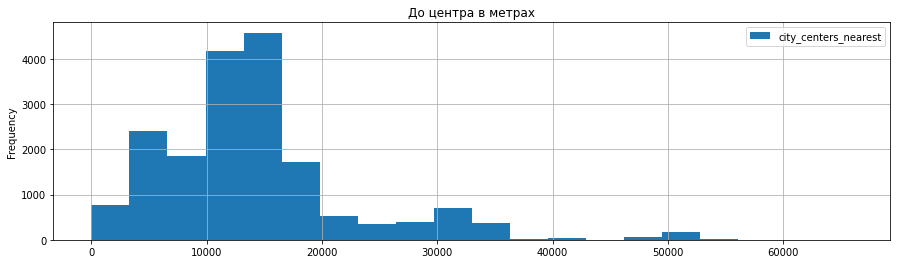

In [71]:
# сторим гистограмму расстояния до центра города в метрах

data.plot(kind='hist', 
          title='До центра в метрах', 
          y='city_centers_nearest', 
          bins=20, 
          grid=True, 
          figsize=(15,4),
          range=(0,66000));

Наибольшее число объявлений находится в диапазоне между примерно 350 и 20000 м и дальше идет спад. Что соответствует среднему значению.

In [72]:
# общее представление о расстояние до ближайщего аэропорта

data['airports_nearest'].describe()

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Близжайщие аэропрты: минимальное расстояние - 0, максимальное - 84869, среднее - 28803.  
Вызывает подозрение нулевое расстояние. Обычно жилые дома не строят настолько близко к аэропортам. Стоит уточнить у сотрудников, предоставивших данные.

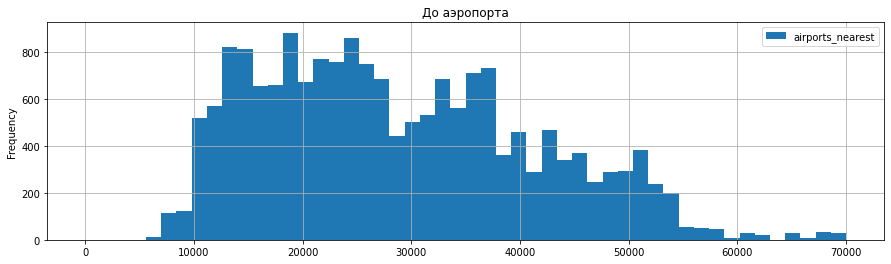

In [73]:
# сторим гистограмму расстояния до ближайщего аэропорта

data.plot(kind='hist', 
          title='До аэропорта', 
          y='airports_nearest', 
          bins=50, 
          grid=True, 
          figsize=(15,4),
          range=(0,70000));

На гистограмме 0 значений не видно, вероятно там есть некая ошибка в данных, что появилось при просмотре минимальное нулевое значение.    
В остальном видно, что наибольшее число предложений квартир находится между 10000 и 55000 метров от аэропортов.

In [74]:
# общее представление о расстояние до ближайшего парка

data['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Ближайщие парки: миниальное расстояние - 1, максимальное - 3190, среднее - 490,8 метров.  
Поосмотрим данные наглядно на гистограмме.

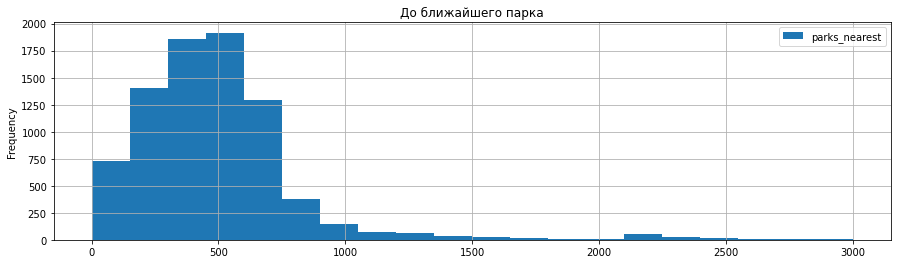

In [75]:
# строим гистограмму расстояния до ближайшего парка

data.plot(kind='hist', 
          title='До ближайшего парка', 
          y='parks_nearest', 
          bins=20, 
          grid=True, 
          figsize=(15,4),
          range=(0,3000));

Основные данные лежат от 0 до 900, дальше идет на убыль. Похоже на распределение Пуассона стреящееся к нормальному.  
Это может быть вывано тем, что в крупных городах много скверов, а в городских поселках и деревнях в принципе вокруг могут быть леса.  
Тем ем неменее стоит уточнить про нулевые значения. В исходных данных может быть ошибка.

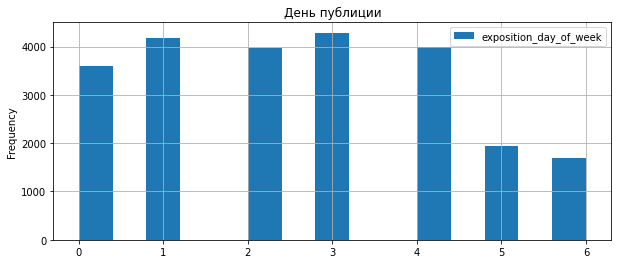

In [76]:
# сторим гистограмму дней публикации объявлений
# так как для этих данных лучше сразу наглядно смотреть график

data.plot(kind='hist', 
          title='День публиции', 
          y='exposition_day_of_week', 
          bins=15, 
          grid=True, 
          figsize=(10,4));

Меньше всего публикуют в выходные дни, больше всего во вторник и четверг, чуть меньше в среду и пятницу, и еще чуть меньше в понедельник. Видимо вторник и четверг самые оптимальные дни, когда появляется наибольшее количество объявлений.

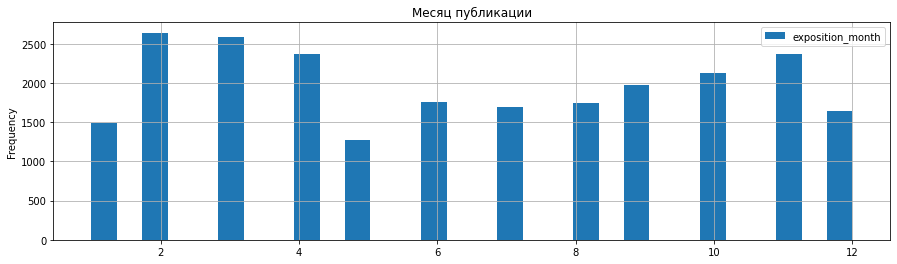

In [77]:
# сторим гистограмму месяца публикации объявлений
# так как для этих данных лучше сразу наглядно смотреть график

data.plot(kind='hist', 
          title='Месяц публикации', 
          y='exposition_month', 
          bins=30, 
          grid=True, 
          figsize=(15,4));

Пик публикаций приходится на февраль, март, апрель и ноябрь. В остальные месяцы чуть меньше и разница между ними не значительно.

**Вывод по изучению данных:**  

- распределение данных в основном выглядит реально, но есть нулевые значения в расстояниях до центра города и ближайщего аэропорта и парка, которые стоит уточнить с содниками, предоставившими данные
- общая площадь: минимальная - 12, максимальная - 900 кв.м, cредняя - 60 кв.м, наибольшее число значений находится между 25 и 70-75 кв метрами
- жилая площадь: варьируется от 2 до 409,7 кв метров, при этом среднее значение 34 кв м., 
- кухонная площадь: минимальная - 1.3, максимальная - 112 кв.м, cредняя - 10.4 кв.м, наибольшее число значений находится между 5 и 25 кв метрами
- стоимость: минимальная - 12 190, максимальная - 763 000 000 кв.м, cредняя - 6 541 127 рублей, наибольшее число значений находится до 10 млн рублей;  стоит уточнить про минимальную и максимальную цену - они выглядят нереалистично
- количество комнат: варьируется от 1 до 19, среднее - 2, основные значения до 4 комнат
- высота потолков: минимальная - 1 кв м, максимальная - 10 кв.м, cредняя - 2.7 кв м, наибольшее число значений находится между 2.4 и 3 кв м; при этом минимальные и максимальные цифры выглядят нереалистично и их стоит уточнить
- этаж: самый низий - 1, самый высокий - 33, cредний - 5-6, наибольшее число значений находится между 2 и 17 этажами
- тип этажа: наибольшее количество значение в типе 'другой', что соотвествует данным из этажей
- количество этажей в доме: минимальное - 1, максимальное - 60, cредний - 10-11, наибольшее число значений находится между 5 и 25, что так же совпадает с двуми предыдущими выводами
- расстояние до центра города: минимальное - 181, максимальное - 66 968 м, cреднее - 14 198 м, наибольшее число значений находится в диапазоне от 350 до 20 000 метров
- расстояние до ближайщего аэропорта: минимальное - 0, максимальное - 84 869 м, cреднее - 28 803 м, наибольшее число значений находится между 10 000 и 55 000; про минимальное значение стоит уточнить, как замечено выше в первом пункте
- расстояние до ближайщего парка: минимальное - 1 м, максимальное - 3190 м, cреднее - 490.8 м, наибольшее число значений находится между 0 и 900 м
- день публикации: больше всего публикаций во вторник и четверг, чуть меньше - в среду и пятницу, еще меньше в понедельник и совсем мало в выходные дни
- месяц публикации: больше всего публикую объявлений в феврале, марте, апреле и ноябре. 

#### Изучите, как быстро продавались квартиры  

- Построим гистограмму.
- Посчитаем среднее и медиану.

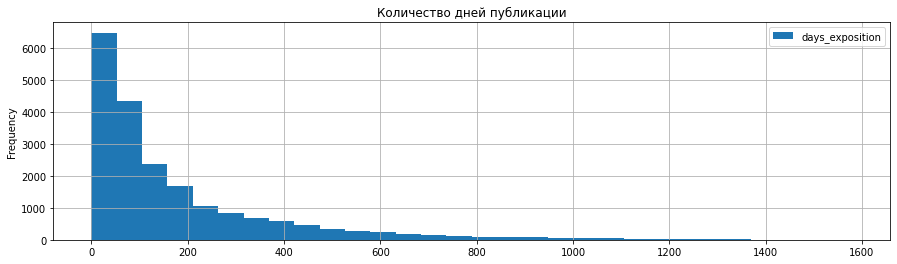

In [78]:
# изучим, как быстро продавались квартиры
# построим гистограмму количества дней публикации

data.plot(kind='hist', 
          title='Количество дней публикации', 
          y='days_exposition', 
          bins=30, 
          grid=True, 
          figsize=(15,4),
          range=(0,1580));

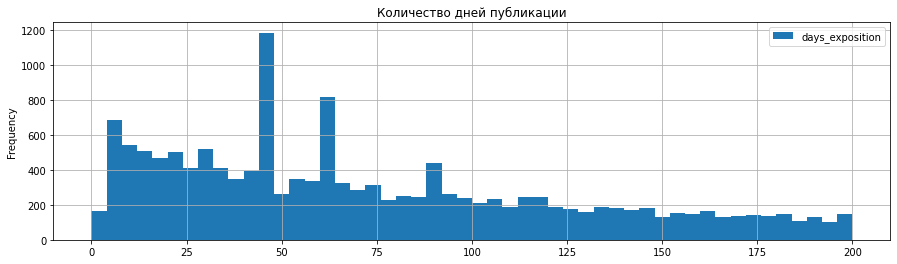

In [79]:
# построим гистограмму в диапазоне от 0 до 200
# чтобы рассмотреть детальнее большую площать значений

data.plot(kind='hist', 
          title='Количество дней публикации', 
          y='days_exposition', 
          bins=50, 
          grid=True, 
          figsize=(15,4),
          range=(0,200));

In [80]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [81]:
#data[data['days_exposition']!=0]['days_exposition'].median()
data['days_exposition'].median()

95.0

**Вывод:**  
Среднее значение продолжительности дней публикации 180, а медианное значение 95.  
По гистограмме видно, что медианное значение ближе к пику - он находится как раз от 90 до 100 дней.  
При этом общая масса продолжительности дней публикации находится в диапазоне от 0 до 100 дней. С минимальным значением в 1  день и максимальным значением 1580.  
Самая быстрая продажа равна минимальному значению - 1 день, а самая долгая - максимальному - 1580
В данном случае максимальное значение выглядет не правдободобно. Стоит уточнить данные, хотя иногда бывает такое, что квартиры стоят очень долго по необъяснимым причинам.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Изучим, зависит ли цена от:**  

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

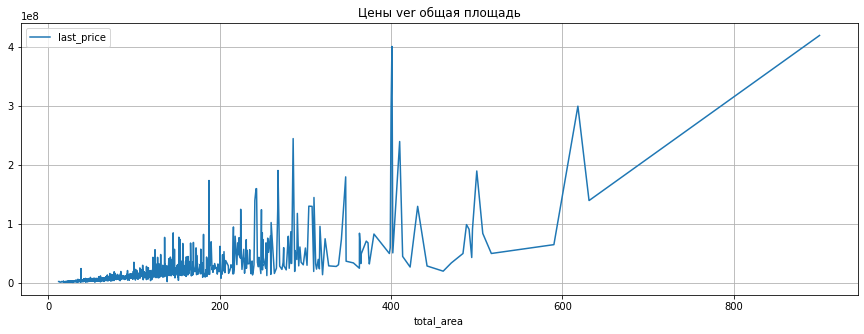

In [82]:
# cтроим сводную таблицу на основе общей площади и стоимости объекта
# строим график взаимосвязи этих параметров

data.pivot_table(index='total_area', values='last_price')\
.plot(title='Цены ver общая площадь', grid=True, figsize=(15,5));

In [83]:
# проверим коэффицентр корреляции Пирсона

data['total_area'].corr(data['last_price']).round(2)

0.65

На графике виден рост цены с ростом общей площади.  
Коэффицент корреляции Пирсона равен 0,64. Это означает, что линейная корреляция присутствует и при увеличении общей площади растет цена и наоброт.  

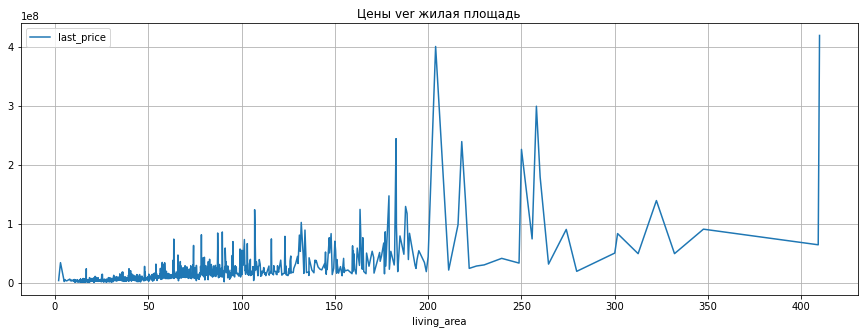

In [84]:
# cтроим сводную таблицу на основе жилой площади и стоимости объекта
# строим график взаимосвязи этих параметров

(data.pivot_table(index='living_area', values='last_price')
 .plot(title='Цены ver жилая площадь', grid=True, figsize=(15,5)));

In [85]:
# проверим коэффицентр корреляции Пирсона

data['living_area'].corr(data['last_price']).round(2)

0.57

График скачкообразный, показывает связь параметров, но не всегда одинаковую, нет четкого роста.  
Коэффицент корреляции Пирсона 0,54 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение жилой площади сопровождается увеличением цены, но так бывает не всегда.

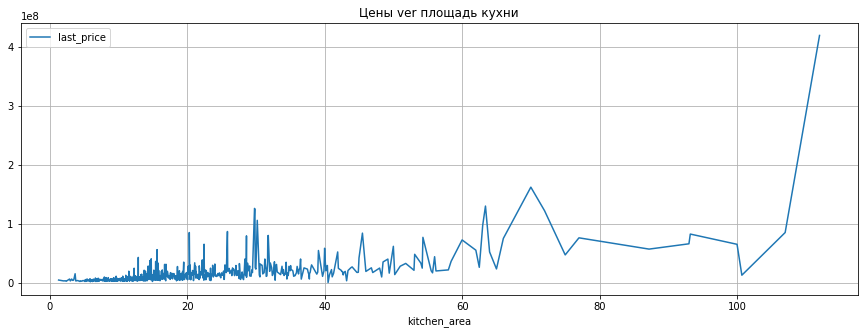

In [86]:
# cтроим сводную таблицу на основе площади кухни и стоимости объекта
# строим график взаимосвязи этих параметров

(data.pivot_table(index='kitchen_area', values='last_price')
 .plot(title='Цены ver площадь кухни', grid=True, figsize=(15,5)));

In [87]:
# проверим коэффицентр корреляции Пирсона

data['kitchen_area'].corr(data['last_price']).round(2)

0.52

График показывает небольшой рост в зависимости от роста параметров, при этом он скачкообразный и значит некая связь есть, но крайне слабая.  
Коэффицент корреляции Пирсона 0,44 и это говорит о слабой связи. 

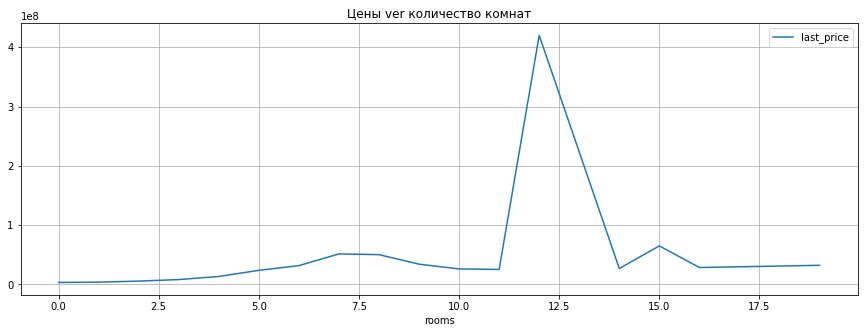

In [88]:
# cтроим сводную таблицу на основе количества комнат и стоимости объекта
# строим график взаимосвязи этих параметров

data.pivot_table(index='rooms', values='last_price')\
.plot(title='Цены ver количество комнат', grid=True, figsize=(15,5));

In [89]:
# проверим коэффицентр корреляции Пирсона

data['rooms'].corr(data['last_price']).round(2)

0.36

На графике виден один пик, а в остальном связи нет.  
Коэффицент корреляции Пирсона 0,37. Линейной связи между количеством комнат и цены почти нет, очень маленькая. 

In [90]:
# построим сводную таблицу типа этажа и стоимости
# найдем средннюю стоимость для каждого типа этажа

round(data.pivot_table(index='floor_type', values='last_price', aggfunc='mean'))

,last_price
floor_type,
другой,6674349.0
первый,4800465.0
последний,7359138.0


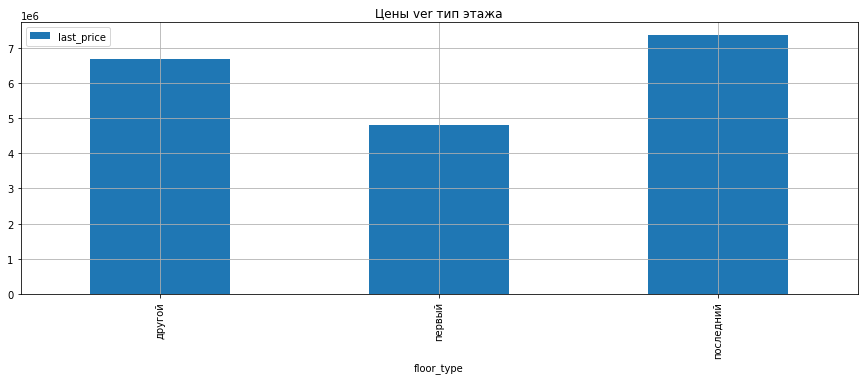

In [91]:
# проверим информацию сводной таблицы на графике

(data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
 .plot(kind='bar', title='Цены ver тип этажа', grid=True, figsize=(15,5)));

И таблица и график показывают, что самая высокая цена у квартир на последнем этаже и самая низкая у тех, которые на первом. Цены на другие этажи находятся между ними и похоже зависят уже от других параметров. 

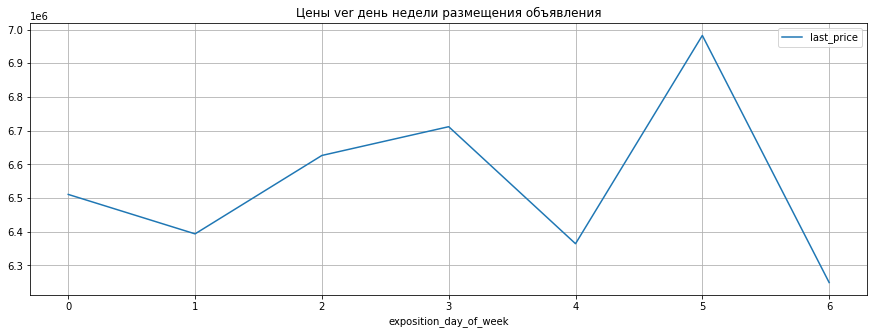

In [92]:
# cтроим сводную таблицу на основе дня недели размещения объявление и стоимости объекта
# строим график взаимосвязи этих параметров

data.pivot_table(index='exposition_day_of_week', values='last_price')\
.plot(title='Цены ver день недели размещения объявления', grid=True, figsize=(15,5));

In [93]:
data['exposition_day_of_week'].corr(data['last_price']).round(5)

0.00161

Коэффицент Пирсона равен 0. Линейной связи нет, график это подтверждает.

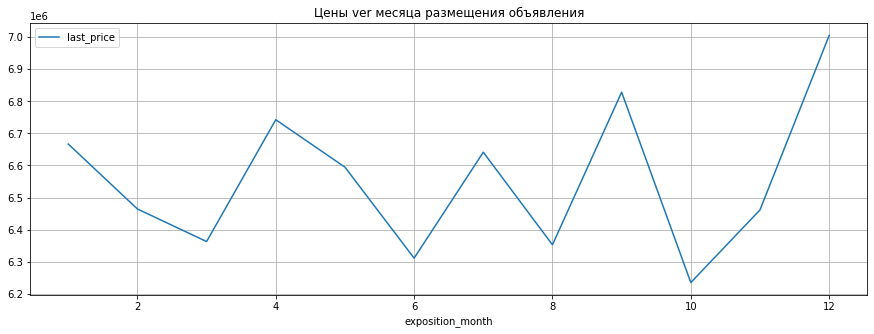

In [94]:
# cтроим сводную таблицу на основе месяца размещения объявление и стоимости объекта
# строим график взаимосвязи этих параметров

data.pivot_table(index='exposition_month', values='last_price')\
.plot(title='Цены ver месяца размещения объявления', grid=True, figsize=(15,5));

In [95]:
# проверим коэффицентр корреляции Пирсона

data['exposition_month'].corr(data['last_price']).round(5)

0.00274

Коэффицент Пирсона равен 0. Линейной связи между месяцем публикации объявления и ценой нет, график это подтверждает.

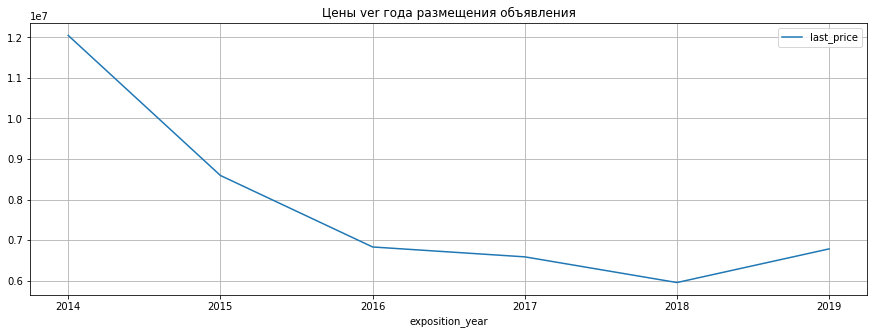

In [96]:
# cтроим сводную таблицу на основе года размещения объявление и стоимости объекта
# строим график взаимосвязи этих параметров

data.pivot_table(index='exposition_year', values='last_price')\
.plot(title='Цены ver года размещения объявления', grid=True, figsize=(15,5));

In [97]:
# проверим коэффицентр корреляции Пирсона

data['exposition_year'].corr(data['last_price']).round(2)

-0.04

Коэффицент Пирсона равен -0,04. Линейная связь между годом публикации объявления и ценой отсутвует, но она все-таки с минусом. И на н графике видено падение цен от 2014 до 2018 и затем начинется рост.

**Промежуточный вывод:**  
  
- самая сильная связь выявлена между общей площадью и ценой, а так же между жилой площадью и ценой; при росте одного параметра растет другой
- так же есть слабая свзяь между плоадью кухни и ценой, но она слабая и на нее не стоит опираться в финальном выводе
- между годом публикации и ценой есть очень слабая отрицательная корреляция, график показал провал на 2018 году и вероятно это связано с кризисом того года, поэтому в продаже недвижимости есть фактор общей экономической ситуации, который сложно предсказать и учесть заранее
- остальные рассмотренные параметры влияния на цену не показали

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.  
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [98]:
# создадим сводную таблицу на основе названия населенного пунтка и числом размещенных объявлений о продаже
# посчитаем количества и среднее
# переиминуем двухэтажное название в удобное
# отсортируем по убыванию среднего значения и выведем первые 11 населенных пунктов
# потому что в таблицу попадает общее значение

price_sqm_per_locality = data.pivot_table(index='locality_name',
                                           values='price_for_square_meter', 
                                           aggfunc=['count', 'mean'], margins=True)
price_sqm_per_locality.columns = ['count', 'mean']
price_sqm_per_locality.sort_values(by='count', ascending = False).head(11).round()

,count,mean
locality_name,,
All,23650,99432.0
Санкт-Петербург,15721,114849.0
Мурино,556,85682.0
Шушары,440,78677.0
Всеволожск,398,68654.0
Пушкин,369,103126.0
Колпино,338,75425.0
Парголово,327,90176.0
Гатчина,307,68746.0


In [99]:
# перезапишем переременную с учетом вывода первых 10 значений

price_sqm_per_locality = price_sqm_per_locality.sort_values('count', ascending = False).head(11)

In [100]:
# найдем максимальную среднюю цену

price_sqm_per_locality[price_sqm_per_locality['mean']==price_sqm_per_locality['mean'].max()].round()

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.0


In [101]:
# найдем минимальную среднюю цену

price_sqm_per_locality[price_sqm_per_locality['mean']==price_sqm_per_locality['mean'].min()].round()

,count,mean
locality_name,,
Выборг,237,58142.0


**Промежуточный вывод:**  
  
Разброс самых высоких 10 средних значений от 58142 до 114849 за кв м.    
Самая высокая средняя стоимость квартиры в Санкт-Петербурге и равна 114849, а самая низкая - в Выборге и она равна 58142.      
Данные самых дорогих 10 средних значений выглядят реалистично  

#### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра расстояния до центра. 

In [102]:
# сортируем квартиры, расположенные в Санкт-Петербурге
# создаем сводную таблицу на основе расстояния до центра города в км и цена за 1 кв м
# выводим таблицу остсортированную по убыванию цены кв метра

(data.query('locality_name == "Санкт-Петербург"')
 .pivot_table(index = 'city_centers_nearest_kilometers',
              values = 'price_for_square_meter',
              aggfunc = 'mean', margins=True)
 .sort_values(by='price_for_square_meter', ascending=False)
 .round())

,price_for_square_meter
city_centers_nearest_kilometers,
0.0,245834.0
1.0,177005.0
2.0,157849.0
7.0,156177.0
6.0,151012.0
5.0,140510.0
4.0,133283.0
27.0,132116.0
8.0,125671.0


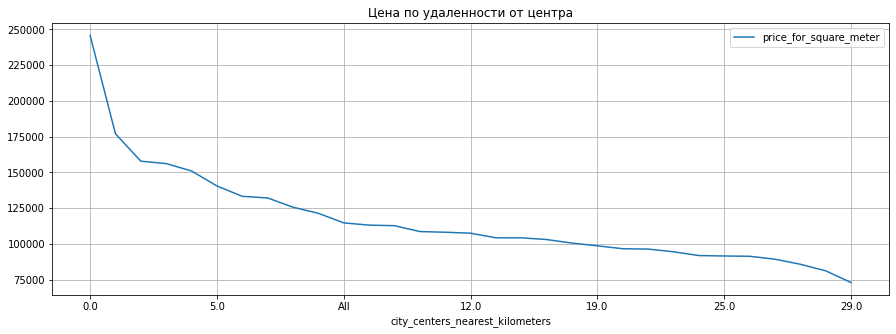

In [103]:
(data.query('locality_name == "Санкт-Петербург"')
 .pivot_table(index = 'city_centers_nearest_kilometers',
              values = 'price_for_square_meter',
              aggfunc = 'mean', margins=True)
 .sort_values(by='price_for_square_meter', ascending=False)
 .round().plot(title='Цена по удаленности от центра', grid=True, figsize=(15,5)));

**Вывод:**   
  
В таблице есть некоторые выбросы:  например, цена на удалении 27 км находится на 8 строчке по стоимости. Что может быть связано с новыми домами или площадью квартир. Такие моменты лучше уточнить у сотрудников, предоставивших данные.  
Но в целом данные выглядят реалистично и растут в пропорциональности к удаленности от центра. И это наглядно видно на графике. Цена падает в зависимости от удаления от центра.

### Общий вывод

Была проведена обработка архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, в ходе которой были обработаны пропуски, явные и неявные дубликаты, аномальные значения.  
  
При изучении данных выявлено следующее:  
- общая площадь: наибольшее число значений находится между 25 и 70-75 кв метрами
- жилая площадь: варьируется от 2 до 409,7 кв метров, при этом среднее значение 34 кв м. 
- кухонная площадь: наибольшее число значений находится между 5 и 25 кв метрами
- стоимость: наибольшее число значений находится до 10 млн рублей
- количество комнат: основные значения до 4 комнат
- высота потолков: наибольшее число значений находится между 2.4 и 3 кв м
- этаж: наибольшее число значений находится между 2 и 17 этажами
- тип этажа: наибольшее количество значение в типе 'другой', что соотвествует данным из этажей
- количество этажей в доме: наибольшее число значений находится между 5 и 25
- расстояние до центра города: наибольшее число значений находится в диапазоне от 350 до 20 000 метров
- расстояние до ближайщего аэропорта: наибольшее число значений находится между 10 000 и 55 000
- расстояние до ближайщего парка: наибольшее число значений находится между 0 и 900 м
- день публикации: больше всего публикаций во вторник и четверг
- месяц публикации: больше всего публикуют объявлений в феврале, марте, апреле и ноябре.
- среднее значение продолжительности дней публикации 169, а медианное значение 95.  
- самая высокая средняя стоимость квартиры среди 10 населенных пунктов в которых наибольшее количество объявлений в Санкт-Петербурге, а самая низкая в Выборге
- разброс самых высоких 10 средних значений стоимости от от 58142 до 114849 за кв м
- cамая быстрая продажа равна 1 дню, а самая долгая  - 1580 дней
  

Мы выдвинули гипотезы о зависимости цены от общей площади, жилой площади, кухонной площади, количества комнат, этажа и дня, месяца публикации. А так же выдвинули гипотезу снижения цены в зависимости от удаления от центра населенного пункта. В ходе проверки этих гипотез имеем:   
  
1. Общая стоимость зависит от общей площади:  
   гипотеза подтвержедена;  
   коэффицент корреляции Пирсона равен 0..64, что как и график указывает на линейную зависимость параметров друг от друга  
    
2. Общая стоимость зависит от жилой площади:  
   гипотеза подтверждена частично  
   коэффицент корреляции Пирсона равен 0.54, что говорит зависимости параметром от роста друг друга, но при этом такая свзяь будет наблюдаться не всегда  
       
3. Общая стоимость зависит от кухонной площади:  
   гипотеза не подтверждена  
   очень низкий коэффицентр Пирсона и возможно в некоторых случаях будет зависимость фатроков от друг друга, но это сложно предсказать и не стоит опираться при дальнецших прогнозах  
  
4. Общая стоимость зависит от года публикации объявления:
   между этитми параметрами есть очень слабая отрицательная корреляция, график показал провал на 2018 году и вероятно это связано с кризисом того года, поэтому в продаже недвижимости есть фактор общей экономической ситуации, который сложно предсказать и учесть заранее 
    
5. Общая стоимость зависит от близости к центру населенного пункта:
   гипотеза подтверилась;  
   данная гипотеза была проверена на ценах квартир в Санкт-Петербурге,график и таблица показали самые высоткие цены в близоти к центре в районе 29 км
      
6. Остальные гипотезы не подтвердились  
  

   